In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Classification/Diabetes_Data.csv"
df = pd.read_csv(url)
df

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,男生,1
1,66,102,128.1,女生,1
2,59,65,103.9,男生,0
3,46,117,94.8,女生,0
4,45,79,57.8,男生,0
...,...,...,...,...,...
395,72,63,97.1,女生,0
396,22,117,156.7,女生,1
397,31,76,119.0,男生,0
398,36,65,96.3,女生,1


In [5]:
df["Gender"] = df["Gender"].map({"男生": 1, "女生": 0})
df

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


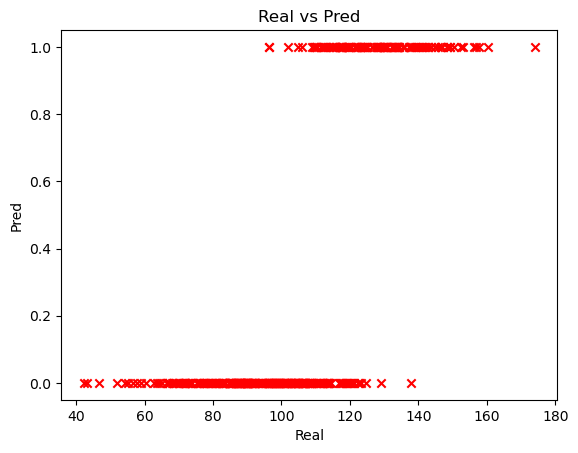

In [43]:
# copy from 2_Cost_function.ipynb
def plot_scatter(x, y):
  import matplotlib.pyplot as plt
  # plt.plot(range(0,80), range(0,80), color="blue")
  plt.scatter(x, y, marker="x", color="red")
  plt.title("Real vs Pred")
  plt.xlabel("Real")
  plt.ylabel("Pred")
  # plt.xlim([-100, 101])
  # plt.ylim([-60, 140])
  # plt.legend()
  plt.show()
    
plot_scatter(df["BloodSugar"], df["Diabetes"])

### Sigmoid 函數    
Sigmoid 函數是一種常用的函數，通常用於將實數範圍映射到(0, 1)之間。它的公式如下：
f(x) = 1 / (1 + e^(-


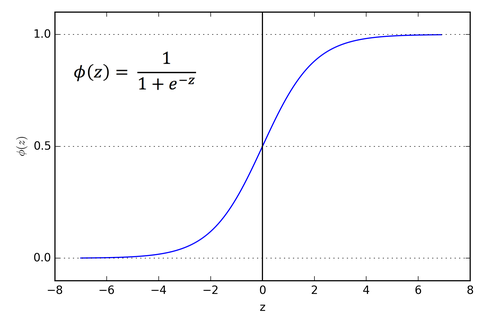x))

In [6]:
from sklearn.model_selection import train_test_split

x = df[["Age", "Weight", "BloodSugar", "Gender"]]
y = df["Diabetes"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)

# to_numpy() 是 Pandas 物件的一部分，用於從 Pandas 數據結構（DataFrame 或 Series）轉換為 NumPy 陣列
# np.asarray 是numpy, 且不會複製一份；若改用np.asarray則會複製一份。
x_train = x_train.to_numpy()
y_train = y_train.to_numpy() 
x_test = x_test.to_numpy()

In [8]:
from sklearn.preprocessing import StandardScaler

### .fit()+.transform() or fit_transform
xscaler = StandardScaler().fit(x_train)
x_train = xscaler.transform(x_train)
x_test = xscaler.transform(x_test)

x_test

array([[ 1.4964114 ,  0.95077942,  1.01425033, -1.06458129],
       [ 1.43615575, -0.2915795 ,  0.06547324, -1.06458129],
       [ 1.67717835, -0.67713916, -2.28906075,  0.93933644],
       [-1.63688239,  1.12213927,  0.23520859,  0.93933644],
       [-1.09458154,  0.99361938, -0.27834966,  0.93933644],
       [ 1.67717835, -1.44825849, -0.86589511,  0.93933644],
       [ 0.05027581, -1.40541853, -0.0346271 , -1.06458129],
       [ 1.79768965,  0.26534002,  1.90644898, -1.06458129],
       [-1.21509284,  1.07929931, -0.07814898,  0.93933644],
       [ 0.89385491,  0.73657961,  1.27973383,  0.93933644],
       [-1.33560414, -0.2915795 ,  0.45281801,  0.93933644],
       [-1.21509284,  0.00830024, -0.7179207 , -1.06458129],
       [-0.25100244, -0.07737968, -2.03663381,  0.93933644],
       [-0.13049114,  1.07929931, -0.49160689, -1.06458129],
       [ 0.65283231,  1.50769894,  0.38753519,  0.93933644],
       [ 0.83359926, -0.2915795 , -0.09990993, -1.06458129],
       [ 0.59257666, -0.

In [9]:
import numpy as np
def sigmoid(z):
    return 1/(1+np.exp(-z))

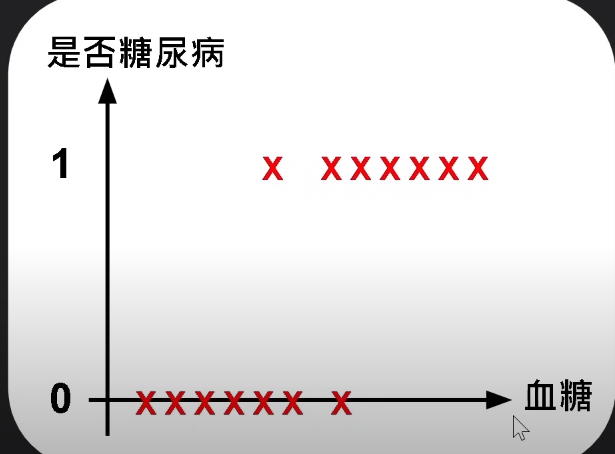

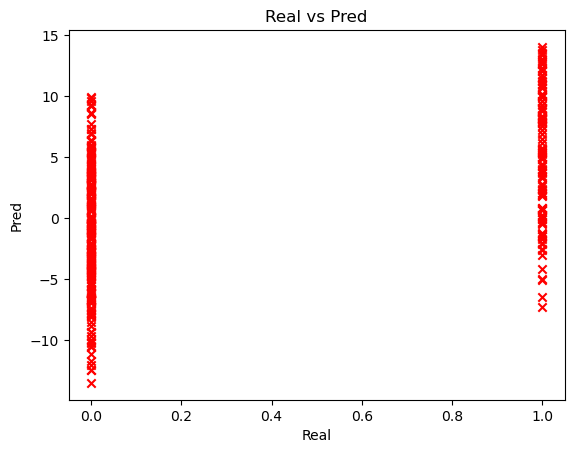

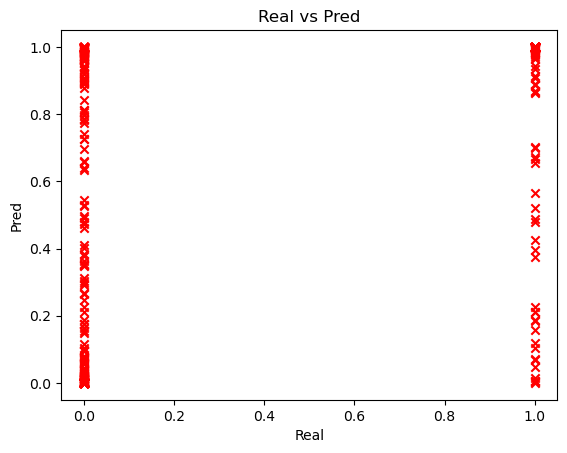

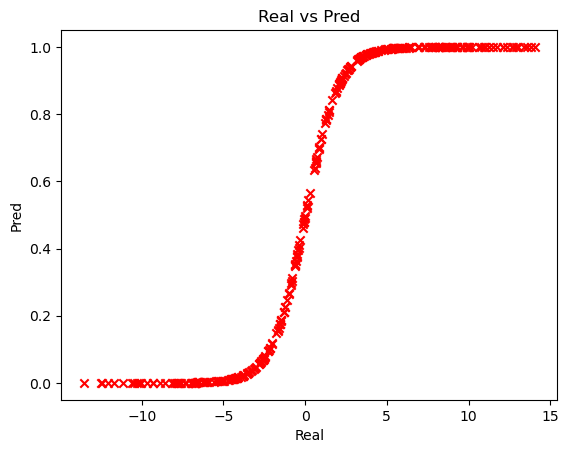

In [37]:
import numpy as np
w = np.array([1, 2, 3, 4])
b=1

y_pred = (x_train*w).sum(axis=1) + b
y_pred_s = sigmoid(y_pred)

plot_scatter(y_train, y_pred)
plot_scatter(y_train, y_pred_s)
plot_scatter(y_pred, y_pred_s)
